In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
image_path= r"C:\Users\Dell\Downloads\Vegetable\Vegetable Images"
train_path= "/train"
test_path= "/test"
val_path= "/validation"

In [5]:
subdirectory= [f.name for f in os.scandir(image_path + train_path) if f.is_dir()]

In [7]:
for sub in subdirectory:
    print(sub)

Bean
Bitter_Gourd
Bottle_Gourd
Brinjal
Broccoli
Cabbage
Capsicum
Carrot
Cauliflower
Cucumber
Papaya
Potato
Pumpkin
Radish
Tomato


In [8]:
def view_random_image(data_dir, class_dir, n_row= 1, n_col= 1):
    target_dir =image_path + "/" + data_dir + "/" + class_dir + "/"
    
    rand_image = random.sample(os.listdir(target_dir), 4)
    
    fig, axs = plt.subplots( n_row, n_col)
    
    for i , ax in enumerate(axs.flat):
        img = mpimg.imread(target_dir + rand_image[i])
        ax.imshow(img)
        ax.set_title(f"{class_dir} {i+1}/n {img.shape}")
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()

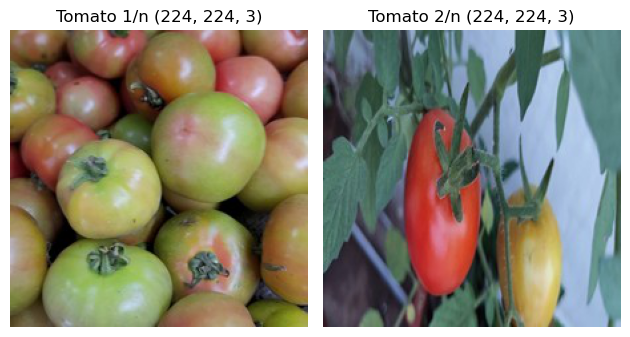

In [14]:
view_random_image("train", "Tomato", 1,2)

In [16]:
tf.random.set_seed(42)

## Scaling Images

In [17]:
train_datagen = ImageDataGenerator(rescale= 1.0 / 255)

## Data Augmentation

In [18]:
train_datagen = ImageDataGenerator(rescale= 1.0/255,
                                  rotation_range= 20,
                                  width_shift_range= 0.2,
                                  height_shift_range= 0.2,
                                  shear_range= 0.2,
                                  zoom_range= 0.2 ,
                                  horizontal_flip= True,
                                  fill_mode= 'nearest')

In [19]:
val_datagen = ImageDataGenerator( rescale= 1.0/255)
test_datagen = ImageDataGenerator( rescale= 1./255)

In [20]:
img_size = (224,224)

In [21]:
train_data = train_datagen.flow_from_directory(image_path + train_path,
                                              target_size= img_size,
                                              batch_size=32,
                                              class_mode="categorical",
                                              seed=42)

Found 15000 images belonging to 15 classes.


In [22]:
val_data = val_datagen.flow_from_directory(image_path + val_path,
                                              target_size= img_size,
                                              batch_size=32,
                                              class_mode="categorical",
                                              seed=42)

Found 3000 images belonging to 15 classes.


In [23]:
test_data = test_datagen.flow_from_directory(image_path + test_path,
                                              target_size= img_size,
                                              batch_size=32,
                                              class_mode="categorical",
                                              seed=42)

Found 3000 images belonging to 15 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten,Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [41]:
model_1 = Sequential()

model_1.add(Conv2D(filters= 20, kernel_size=(3,3), activation="relu", input_shape= (224,224,3)))

model_1.add(Conv2D(filters= 20, kernel_size=(3,3),activation="relu"))
model_1.add(MaxPool2D((2,2), padding="valid"))

model_1.add(Conv2D(30 , (3,3), activation="relu"))
model_1.add(Conv2D(30 , (3,3), activation="relu"))
model_1.add(MaxPool2D((2,2)))

model_1.add(Flatten())
model_1.add(Dense(15, activation="softmax")) #15 is number of outputs

In [42]:
# ## Compile the model

model_1.compile(
    loss="categorical_crossentropy",
    optimizer = Adam(),
    metrics=["accuracy"]
    )

In [43]:
# # Fit the model 
history_1 = model_1.fit(
    train_data,
    validation_data=val_data,
    epochs=10

)

Epoch 1/10
469/469 [==============================] - 1455s 3s/step - loss: 1.2835 - accuracy: 0.5725 - val_loss: 0.7346 - val_accuracy: 0.7697
Epoch 2/10
469/469 [==============================] - 1263s 3s/step - loss: 0.7954 - accuracy: 0.7464 - val_loss: 0.5000 - val_accuracy: 0.8390
Epoch 3/10
469/469 [==============================] - 1201s 3s/step - loss: 0.6253 - accuracy: 0.8029 - val_loss: 0.3598 - val_accuracy: 0.8853
Epoch 4/10
469/469 [==============================] - 1200s 3s/step - loss: 0.5267 - accuracy: 0.8359 - val_loss: 0.4107 - val_accuracy: 0.8627
Epoch 5/10
469/469 [==============================] - 1198s 3s/step - loss: 0.4574 - accuracy: 0.8571 - val_loss: 0.2397 - val_accuracy: 0.9257
Epoch 6/10
469/469 [==============================] - 1284s 3s/step - loss: 0.4055 - accuracy: 0.8717 - val_loss: 0.2618 - val_accuracy: 0.9213
Epoch 7/10
469/469 [==============================] - 1211s 3s/step - loss: 0.3589 - accuracy: 0.8899 - val_loss: 0.3131 - val_accuracy:

In [44]:
from tensorflow.keras.models import save_model, load_model

model_1.save("Veg_model.h5")
model_1.evaluate(test_data)


94/94 [==============================] - 78s 835ms/step - loss: 0.2776 - accuracy: 0.9120


[0.2776011824607849, 0.9120000004768372]

In [47]:
predictions = model_1.predict(test_data)

94/94 [==============================] - 60s 637ms/step


In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
y_pred_class = np.argmax(predictions, axis=1)
y_true_class = test_data.classes



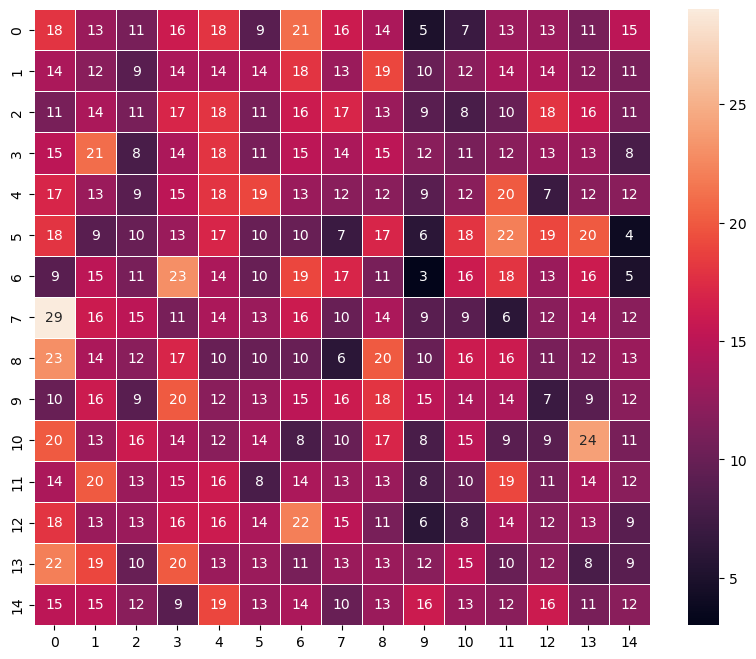

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_true_class, y_pred_class),
    annot=True,
    annot_kws={"fontsize": 10},
    fmt=".0f",
    linewidth=0.5,
    square=True,
)
plt.show()


In [37]:
# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 15)                376335    
                                                                 
Total params: 15,091,023
Trainable params: 376,335
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
# base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 45s 1us/step


In [34]:
# model = Sequential()

# model.add(base_model)

# model.add(Flatten())
# model.add(Dense(15, activation="softmax"))

# base_model.trainable = False

In [36]:
# # Compile model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])


In [39]:
# history = model.fit  (   
#          train_data,
#         validation_data=val_data,
#         epochs=5,

# )

Epoch 1/5
  2/469 [..............................] - ETA: 5:25:32 - loss: 3.4201 - accuracy: 0.1094

KeyboardInterrupt: 

In [ ]:
predictions = model_2.predict(test_data)